## Extract fan data as csv files (one per sample)

In [43]:
import json
import pandas as pd
import os

In [44]:
# Get a list of all files
path = 'datasets/home_fan/'
list_files = [path+i for i in os.listdir(path)]
list_files

['datasets/home_fan/high_spd.json',
 'datasets/home_fan/mid_spd.json',
 'datasets/home_fan/low_spd.json',
 'datasets/home_fan/off.json']

## Place the data into multiple df's

In [45]:
data_list = []

for file_name in list_files:
    # Extract them in a list
    type_n_data = []

    with open(file_name) as file:
        for line in file:
            json_obj = json.loads(line)
            type_n_data.append(json_obj)
    

    # Make a df of each sample
    type_df_list = []
    for i, item in enumerate(type_n_data):
        values = item['payload']['values']
        df = pd.DataFrame(values)
        type_df_list.append(df)
    
    data_list.append(type_df_list)

#### df architecture

 0 - xAxis;
 1 - yAxis;
 2 - zAzis;

### Plot a sample without the mean

0    9.693817
1   -0.693127
2   -0.290650
dtype: float64


<AxesSubplot:>

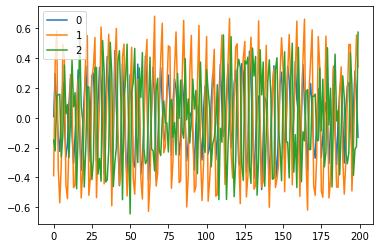

In [51]:
print(data_list[3][2].mean())
tfff = data_list[1][2] - data_list[1][2].mean()
tfff.plot()

In [26]:
# Get a list with the mean removed
var_list = []
for i in data_list:
    list_means_remov = []
    # take 20 samples
    for j in range(20):
        list_means_remov.append(i[j].mean())
    var_list.append(pd.DataFrame(list_means_remov).var())

### Place each sample in a separate csv file
And on different folders


In [58]:
import csv

folder_name = ["high_spd/", "mid_spd/", "low_spd/", "off/"]

for i in range(4):
    index = 0
    # Place each sample in a csv file
    for sample in data_list[i]:
        # Save as csv file
        sample.to_csv(path_or_buf='datasets/home_fan_csv/' + folder_name[i] +str(index)+".csv", header=False, index=False)
        # Increment index
        index+=1
    